# DualNum and Dual_c Tutorial

This notebook introduces the `DualNum` package, including its Python-based `Dual` implementation and its Cythonized faster `Dual_c` version. We'll explore their features, basic usage, and performance differences.

By the end of this notebook, you will:
- Understand the fundamentals of dual numbers.
- Learn how to use the `Dual` and `Dual_c` classes for arithmetic, trigonometric, and other mathematical operations.
- See how to compute derivatives using dual numbers.
- Compare performance between the Python and Cython implementations.
- Visualize derivatives with matplotlib.

In [29]:
import sys
from pathlib import Path
import os
import matplotlib.pyplot as plt
import time

root_dir = Path(os.getcwd()).resolve().parents[0]
if str(root_dir) not in sys.path:
    sys.path.insert(0, str(root_dir))


In [30]:
from DualNum import Dual, compute_derivative
from DualNum_c import Dual_c
print("DualNum is successfully imported!")
print("DualNum_c is successfully imported!")


DualNum is successfully imported!
DualNum_c is successfully imported!


## Basic Usage with Dual

The `Dual` class represents dual numbers, which have a real part and a dual part. You can perform operations like addition, subtraction, multiplication, and division, as well as compute transcendental functions like sine, cosine, and logarithm.


In [4]:
# Create a dual number with real part 2 and dual part 1
x = Dual(2, 1)

# Perform operations
y = x + x
z = x.sin() + x.log()

# Print results
print("y:", y)  # y = 2x
print("z:", z)  # z = sin(x) + log(x)


y: Dual(real=4, dual=2)
z: Dual(real=1.6024446073856269, dual=0.0838531634528576)


## Basic Usage with Dual_c

The `Dual_c` class in the `DualNum_c` module is the Cythonized version of `Dual`. It offers the same functionality but with significantly improved performance for computationally intensive tasks.


In [12]:
# Create a dual number with real part 2 and dual part 1
x = Dual_c(2, 1)

# Perform operations
y = x + x
z = x.sin() + x.log()

# Print results
print("y (Dual_c):", y)  # y = 2x
print("z (Dual_c):", z)  # z = sin(x) + log(x)


y (Dual_c): Dual_c(real=4, dual=2)
z (Dual_c): Dual_c(real=1.6024446073856269, dual=0.0838531634528576)


## Comparing Performance: Dual vs Dual_c

Let's compare the performance of the `Dual` and `Dual_c` implementations for a computationally intensive task.


In [25]:
# Define a function
def f(x):
    return (x.sin()).log() + (x * x * x.cos())

# Compute derivatives using Dual
start = time.time()
for _ in range(10000):
    compute_derivative(f, 2, Dual)
end = time.time()
print(f"Time taken with Dual: {end - start:.4f} seconds")

# Compute derivatives using Dual_c
start_c = time.time()
for _ in range(10000):
    compute_derivative(f, 2, Dual_c)
end_c = time.time()
print(f"Time taken with Dual_c: {end_c - start_c:.4f} seconds")

print(f"Speedup: {(end - start) / (end_c - start_c):.2f}x")


Time taken with Dual: 0.0570 seconds
Time taken with Dual_c: 0.0420 seconds
Speedup: 1.36x


## Derivative Computation

Dual numbers can be used to compute derivatives of functions efficiently. The `compute_derivative` function simplifies this process. You pass the function, the point of interest, and the `Dual` class as arguments.


In [5]:
# Define a function
def f(x):
    return (x.sin()).log() + (x * x * x.cos())

# Compute the derivative at x = 1.5
x = 1.5
derivative = compute_derivative(f, x, Dual)
print(f"The derivative of f(x) at x={x} is {derivative}")


The derivative of f(x) at x=1.5 is -1.9612372705533612


## Visualization of Derivatives

We can visualize the derivative of a function over a range of values. This is particularly helpful for understanding the behavior of the function.


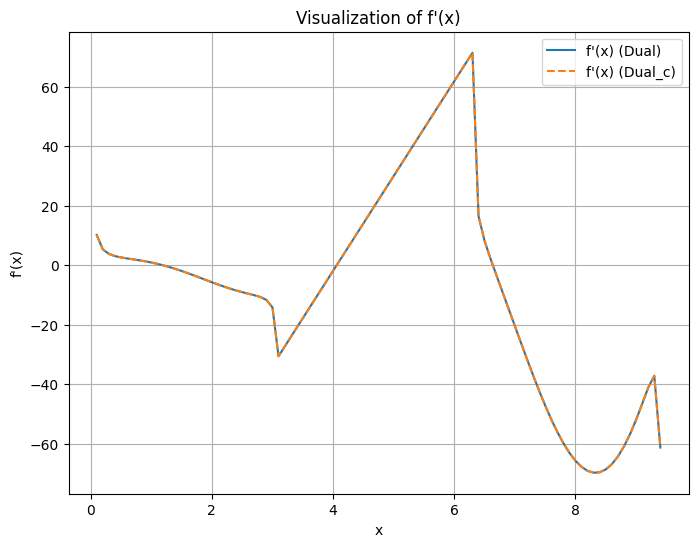

In [26]:
# Define the function
def f(x):
    return (x.sin()).log() + ((x * x) * x.cos())

# Generate x values
x_values = [i / 10 for i in range(1, 100) if Dual(i / 10, 1).sin().real > 0]

# Compute derivatives using Dual
y_values_dual = [compute_derivative(f, x, Dual) for x in x_values]

# Compute derivatives using Dual_c
y_values_dual_c = [compute_derivative(f, x, Dual_c) for x in x_values]

# Plot the derivatives
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values_dual, label="f'(x) (Dual)")
plt.plot(x_values, y_values_dual_c, label="f'(x) (Dual_c)", linestyle="dashed")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Visualization of f'(x)")
plt.legend()
plt.grid()
plt.show()


## Error Handling

The `Dual` class is robust and will raise appropriate errors for invalid operations. For example, attempting to compute the logarithm of a non-positive number will raise a `ValueError`.


In [9]:
try:
    x = Dual(-1, 1)
    print(x.log())
except ValueError as e:
    print(f"Error: {e}")


Error: Logarithm of a non-positive number is undefined.


## Comparing Dual Numbers to Numerical Differentiation

Dual numbers compute derivatives exactly, while numerical differentiation (e.g., finite differences) is prone to errors due to step size. Let’s compare the two methods.


In [27]:
# Numerical differentiation
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

# Define the function
def f(x):
    return (x.sin()).log() + ((x * x) * x.cos())

# Compute derivatives
x = 1.5
dual_derivative = compute_derivative(f, x, Dual)
numerical_derivative_value = numerical_derivative(lambda x: f(Dual(x, 0)).real, x)

print(f"Dual number derivative at x={x}: {dual_derivative}")
print(f"Numerical derivative at x={x}: {numerical_derivative_value}")


Dual number derivative at x=1.5: -1.9612372705533612
Numerical derivative at x=1.5: -1.9612372706409584


## Advanced Features

The `Dual` class also supports hyperbolic functions and other advanced operations. Here's an example.


In [28]:
# Hyperbolic functions
x = Dual(2, 1)
y = x.sinh() + x.cosh()
print("Hyperbolic result:", y)


Hyperbolic result: Dual(real=7.38905609893065, dual=7.38905609893065)


## Summary

In this notebook, we explored the following:
- Basics of dual numbers and their operations.
- How to compute derivatives with `DualNum`.
- Visualizing derivatives and comparing dual numbers to numerical methods.

For more information, refer to the [documentation](../index.html) or check the source code.


In [41]:
import time
import numpy as np
from DualNum import Dual
from DualNum_c import Dual_c

def f(x):
    return x.exp() * x.cos() * x.sin()

# Define the range and points
x_values = np.linspace(1, 100, 10000)

# Using Dual (Python version)
start_python = time.time()
derivatives_python = [f(Dual(x, 1)).dual for x in x_values]
end_python = time.time()
time_python = end_python - start_python

# Using Dual_c (Cython version)
start_cython = time.time()
derivatives_cython = [f(Dual_c(x, 1)).dual for x in x_values]
end_cython = time.time()
time_cython = end_cython - start_cython

# Compare the performance
speedup = (time_python - time_cython) / time_python * 100
print(f"Python Version Time: {time_python:.4f} seconds")
print(f"Cython Version Time: {time_cython:.4f} seconds")
print(f"Speedup: {speedup:.2f}%")


Python Version Time: 0.0421 seconds
Cython Version Time: 0.0335 seconds
Speedup: 20.32%
